In [16]:
import pandas as pd

df_copy = pd.read_csv("df_copy.csv")

In [17]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

df_copy.set_index('Date', inplace=True)
df_copy

,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,SMA_10,SMA_20,EMA_10,BB_MID,BB_STD,BB_UPPER,BB_LOWER,RSI_14,MACD,MACD_SIGNAL
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,57.299999,57.770000,55.820000,57.330002,...,416.142,389.9090,457.330000,389.9090,35.557289,461.023578,318.794422,31.458753,0.000000,0.000000
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,57.299999,57.770000,55.820000,57.330002,...,416.142,389.9090,451.350000,389.9090,35.557289,461.023578,318.794422,31.458753,-2.623704,-0.524741
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,57.299999,57.770000,55.820000,57.330002,...,416.142,389.9090,441.068182,389.9090,35.557289,461.023578,318.794422,31.458753,-7.013857,-1.822564
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,57.299999,57.770000,55.820000,57.330002,...,416.142,389.9090,435.219421,389.9090,35.557289,461.023578,318.794422,31.458753,-9.248719,-3.307795
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,57.299999,57.770000,55.820000,57.330002,...,416.142,389.9090,428.601345,389.9090,35.557289,461.023578,318.794422,31.458753,-11.698383,-4.985913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,75.239998,75.830002,74.489998,74.739998,...,96847.069,98573.8790,97254.787651,98573.8790,2736.061542,104046.002085,93101.755915,45.559444,-954.489721,-776.801785
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,75.239998,75.830002,74.489998,74.739998,...,96771.498,98295.9240,96985.440806,98295.9240,2723.410768,103742.745537,92849.102463,29.493099,-1017.486580,-824.938744
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,...,96677.208,97887.7410,96722.551568,97887.7410,2470.339275,102828.419550,92947.062450,38.821869,-1073.900910,-874.731177


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Test MSE: 165295181.46
Test MAE: 6053.23
Test R² : 0.7202
Test R²%: 72.02%


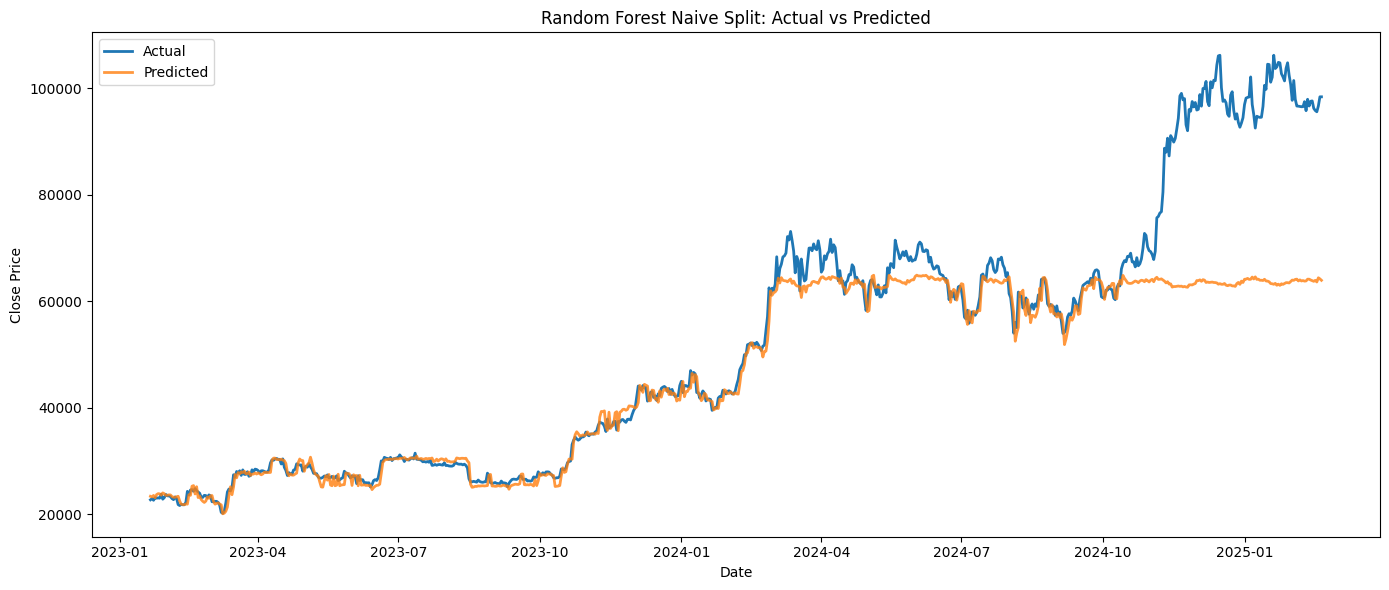

In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']        = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns={'Close_shifted'})

n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y = df['Close_shifted']
y_test = y.iloc[-n_test:]


with open('rf_naive_features.pkl','rb') as f:
    feature_names = pickle.load(f)
with open('rf_naive_scaler.pkl','rb') as f:
    scaler = pickle.load(f)
with open('rf_naive_model.pkl','rb') as f:
    model = pickle.load(f)


X_test_s = scaler.transform(X_test)
X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]

y_pred = model.predict(X_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² : {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest Naive Split: Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()


Test MSE: 324679.83
Test MAE: 376.10
Test R²: 0.9995


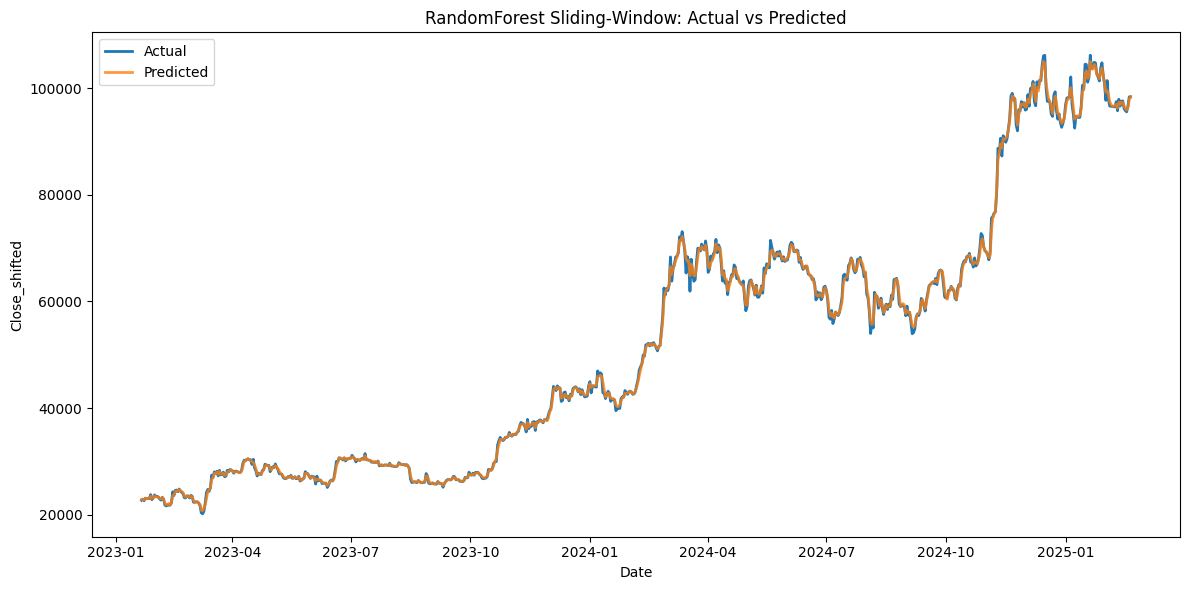

In [19]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('df_copy.csv', index_col=0, parse_dates=True)


df = df.dropna()


X = df.drop(columns={"Close_shifted"})
y = df['Close_shifted']

n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('rf_sliding_pipeline.pkl', 'rb') as f:
    rf_pipe = pickle.load(f)


y_pred = rf_pipe.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

# 7) Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test,   label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,   label='Predicted', linewidth=2, alpha=0.8)
plt.title('RandomForest Sliding‑Window: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close_shifted')
plt.legend()
plt.tight_layout()
plt.show()


Burada naive split yapan random forest test edildi

Burada sliding window stratejisiyle çalışan RF test edildi.

In [20]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()


df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek

for lag in (1,2,3):
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)


X = df.drop(columns=['Close_shifted'])
y = df['Close_shifted']
n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('mlp_features.pkl','rb') as f:
    feature_names = pickle.load(f)
scaler    = load('scaler.joblib')
mlp_model = load('best_mlp_model.joblib')
with open('mlp_config.pkl','rb') as f:
    config = pickle.load(f)

print("Loaded MLP config:", config)



X_test_s = scaler.transform(X_test)
X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]


y_pred = mlp_model.predict(X_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.4f}")
print(f"Test R²% : {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("MLPRegressor: Actual vs Predicted on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


Loaded MLP config: {'hidden_layer_sizes': (100, 50), 'alpha': np.float64(0.0001), 'max_iter': 500, 'activation': 'relu', 'solver': 'adam', 'random_state': 42}


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Adj Close
- BB_LOWER
- BB_MID
- BB_STD
- BB_UPPER
- ...


Test MSE: 353818.53
Test MAE: 378.16
Test R² : 0.9994
Test R²%: 99.94%


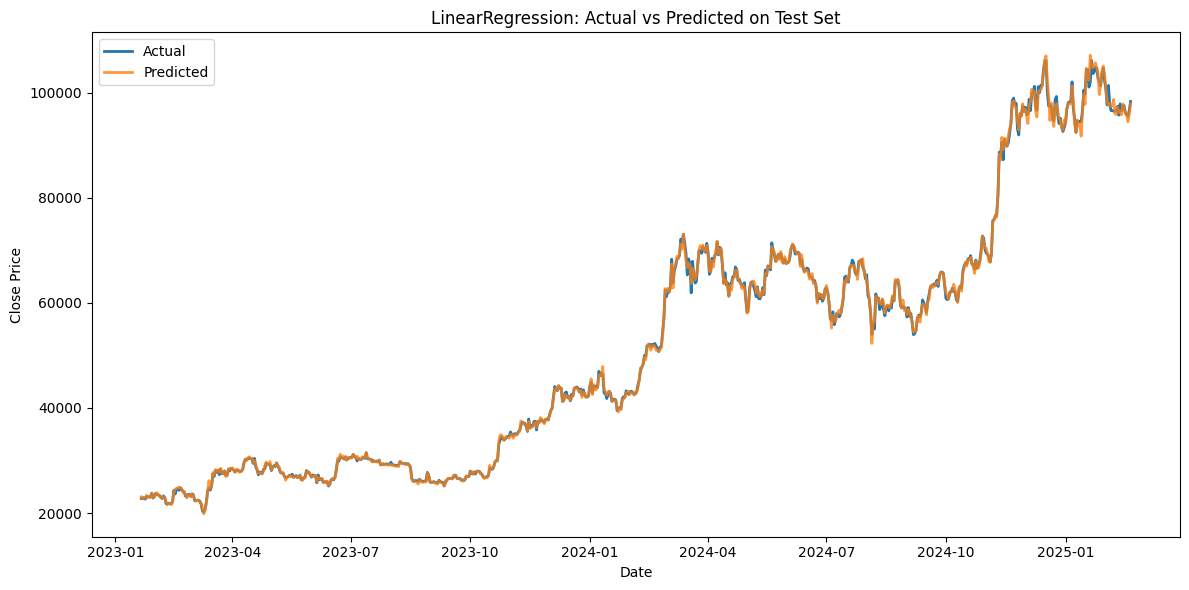

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns=['Close','Adj Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


with open('linear_regression_refit.pkl',       'rb') as f:
    lr_model       = pickle.load(f)
with open('linear_regression_features.pkl',    'rb') as f:
    feature_names  = pickle.load(f)


X_test_sub = X_test[feature_names]


y_pred = lr_model.predict(X_test_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² : {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index,    y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index,    y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LinearRegression: Actual vs Predicted on Test Set')
plt.legend()
plt.tight_layout()
plt.show()


burada lineer regresyon test edildi.

Loaded XGB config: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42}
Test MSE:  154561957.63
Test MAE:  5562.42
Test R² :  0.7374
Test R²%: 73.74%


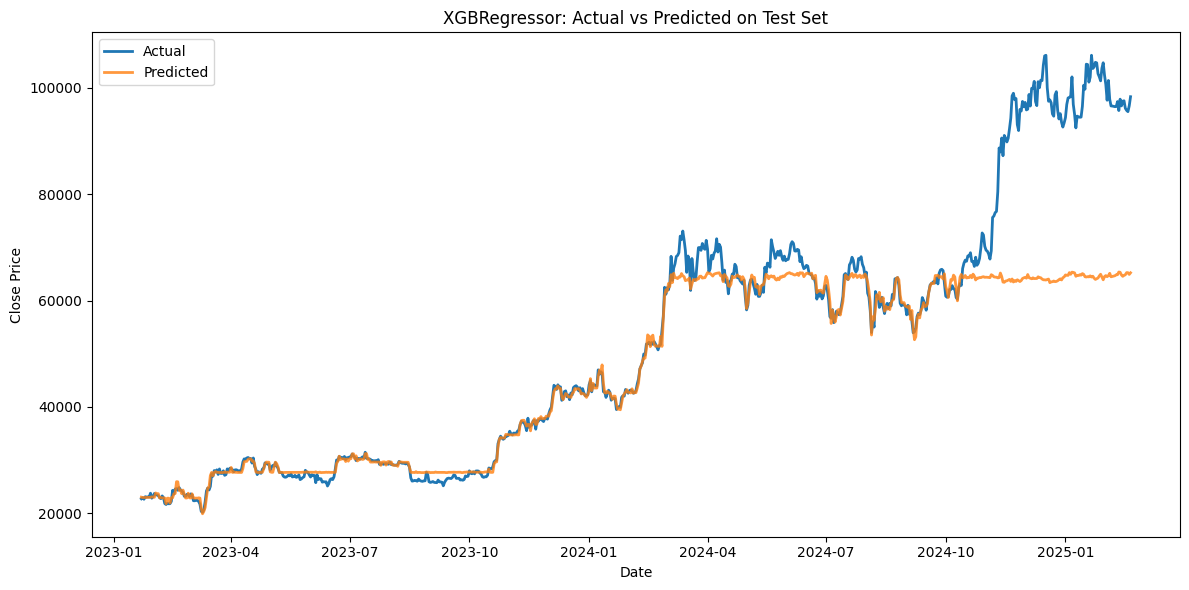

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek
for lag in (1,2,3):
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)


X = df.drop(columns=['Close','Adj Close'])
y = df['Close']
n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('xgb_features.pkl','rb') as f:
    feature_names = pickle.load(f)
with open('xgb_best_model.pkl','rb') as f:
    model = pickle.load(f)
with open('xgb_config.pkl','rb') as f:
    config = pickle.load(f)

print("Loaded XGB config:", config)


X_sub = X_test[feature_names]


y_pred = model.predict(X_sub)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.2f}")
print(f"Test MAE:  {mae:.2f}")
print(f"Test R² :  {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("XGBRegressor: Actual vs Predicted on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Test MSE : 23,604,791.61
Test MAE : 3,442.70
Test R²  : 0.9600
Test R²% : 96.00%


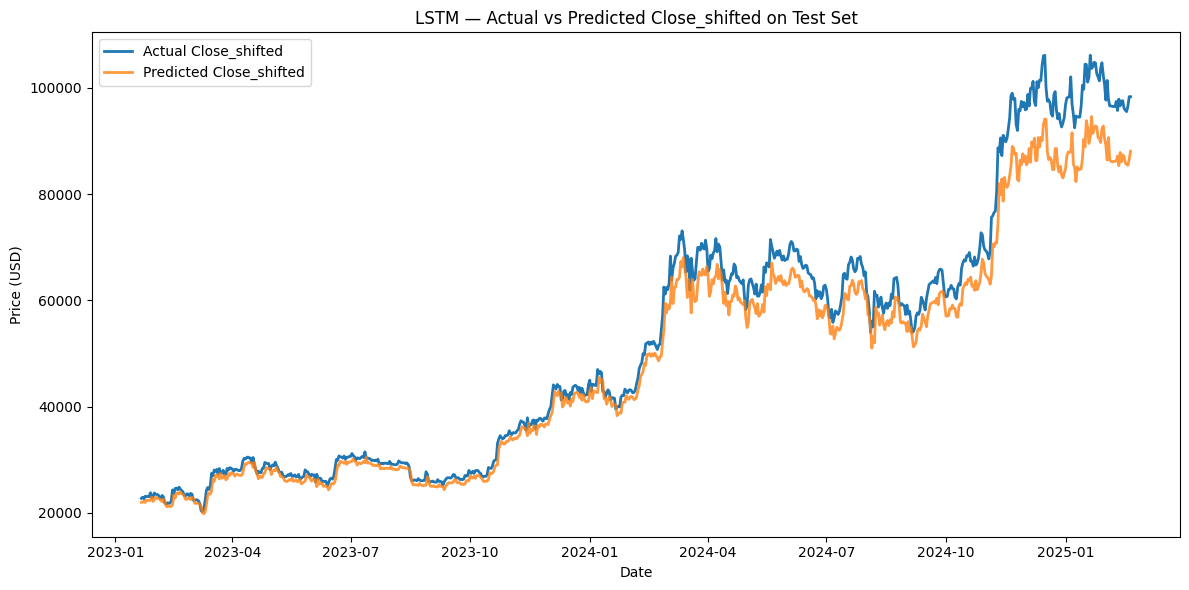

In [ ]:
import math
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('df_copy.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index().dropna()
data = df[['Close_shifted']].values


training_data_len = math.ceil(len(data) * 0.8)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


test_data = scaled_data[training_data_len-60: , :]
X_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test).reshape(-1, 60, 1)


model = load_model('lstm_close_shifted_model.h5', compile=False)



pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled).flatten()
true = y_test.flatten()


mse = mean_squared_error(true, pred)
mae = mean_absolute_error(true, pred)
r2  = r2_score(true, pred)

print(f"Test MSE : {mse:,.2f}")
print(f"Test MAE : {mae:,.2f}")
print(f"Test R²  : {r2:.4f}")
print(f"Test R²% : {r2*100:.2f}%")


dates = df.index[training_data_len:][ : len(pred) ]

plt.figure(figsize=(12,6))
plt.plot(dates, true, label='Actual Close_shifted', linewidth=2)
plt.plot(dates, pred, label='Predicted Close_shifted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('LSTM — Actual vs Predicted Close_shifted on Test Set')
plt.legend()
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Test MSE : 2,283,809.16
Test MAE : 979.74
Test R²  : 0.9961
Test R²% : 99.61%


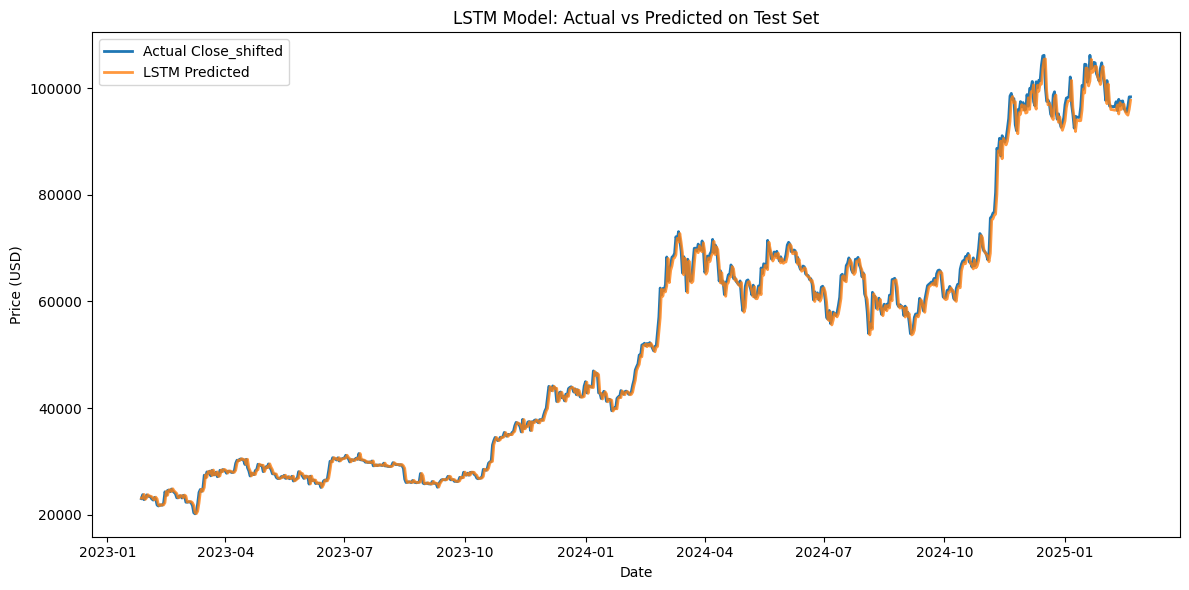

In [ ]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('df_copy.csv', parse_dates=['Date'], index_col='Date')
df = df[['Open', 'Close', 'Low', 'High', 'Volume', 'Close_shifted']].dropna()
df['Return'] = df['Close_shifted'] / df['Close'] - 1
df.dropna(inplace=True)


feature_cols = ['Open', 'Close', 'Low', 'High', 'Volume']
X_raw = df[feature_cols].values
y_raw = df['Return'].values.reshape(-1, 1)


scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')


X_scaled = scaler_X.transform(X_raw)
y_scaled = scaler_y.transform(y_raw)


def make_sequences(X, y, window):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

window_size = 30
X_seq, y_seq = make_sequences(X_scaled, y_scaled, window_size)


split_idx = int(len(X_seq) * 0.8)
X_test, y_test = X_seq[split_idx:], y_seq[split_idx:]


model = load_model('best_lstm.h5', compile=False)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()


start = window_size + split_idx
close_vals = df['Close'].iloc[start:start+len(y_pred)].values
price_true = df['Close_shifted'].iloc[start:start+len(y_pred)].values
price_pred = close_vals * (1 + y_pred)
dates = df.index[start:start+len(y_pred)]

mse = mean_squared_error(price_true, price_pred)
mae = mean_absolute_error(price_true, price_pred)
r2  = r2_score(price_true, price_pred)

print(f"Test MSE : {mse:,.2f}")
print(f"Test MAE : {mae:,.2f}")
print(f"Test R²  : {r2:.4f}")
print(f"Test R²% : {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(dates, price_true, label='Actual Close_shifted', linewidth=2)
plt.plot(dates, price_pred, label='LSTM Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('LSTM Model: Actual vs Predicted on Test Set')
plt.legend()
plt.tight_layout()
plt.show()
